In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


*Reading the data from the csv using Pandas library*

In [2]:
data=pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

*Understanding the biasedness in data*

0    284315
1       492
Name: Class, dtype: int64


<AxesSubplot:title={'center':'value counts'}, xlabel='class', ylabel='frequency'>

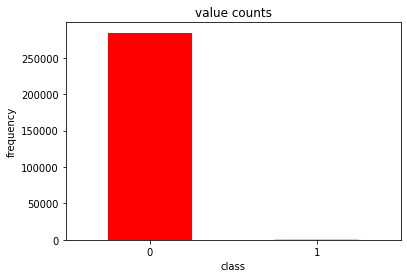

In [3]:
class_count=pd.value_counts(data['Class'], sort=True)
print(class_count)
class_count.plot(kind='bar', rot='0',title='value counts', xlabel='class', ylabel='frequency', color=['red','lightblue'] )

*Understanding the amount feature*

<AxesSubplot:title={'center':'Genuine transactions amount'}, ylabel='Amount'>

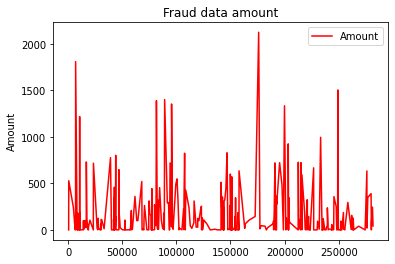

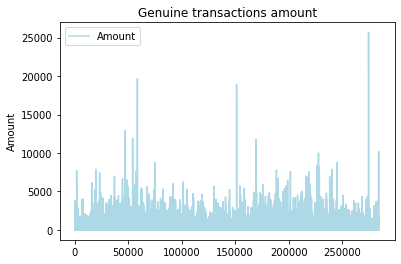

In [4]:
fraud=data[data['Class']==1]
nfraud=data[data['Class']==0]
fraud.plot(y='Amount', kind='line', title='Fraud data amount', ylabel='Amount', color='red')
nfraud.plot(y='Amount', kind='line', title='Genuine transactions amount', ylabel='Amount', color='lightblue')

*Understanding the data and plotting various descriptions of the 'Amount' feature*

Fraud transactions decription
 count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
Genuine transactions decription
 count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


<AxesSubplot:title={'center':'Genuine transactions decription'}, ylabel='Amount'>

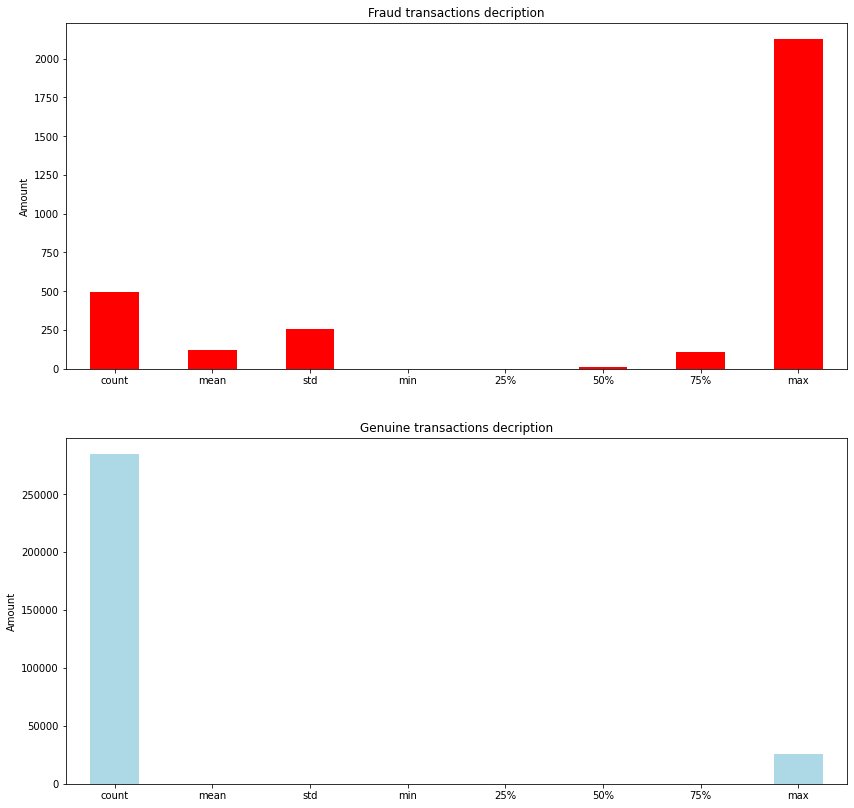

In [5]:
f=fraud['Amount'].describe()
nf=nfraud['Amount'].describe()
print('Fraud transactions decription\n',f)
print('Genuine transactions decription\n',nf)
figure, axes=plt.subplots(2,1, figsize=(14,14))
f.plot(kind='bar', rot='0' , ax=axes[0], title='Fraud transactions decription',ylabel='Amount',color='red')
nf.plot(kind='bar', rot='0',ax=axes[1], title='Genuine transactions decription', ylabel='Amount', color='lightblue')


*Under_sampling*


In [6]:
#applying undersampling
nfraud_us=nfraud.sample(class_count[1])
print(nfraud_us.shape)
#concatenating the under sampled fraud data with the non-fraud entries
dt=pd.concat([nfraud_us, fraud], axis =0)
print(dt)

(492, 31)
            Time        V1        V2        V3        V4        V5        V6  \
154055  100862.0  1.920060 -0.517268  0.132062  0.350562 -0.728157  0.339718   
123014   76776.0 -2.157666  0.388103  2.066349  1.560692 -1.331493  0.865653   
221956  142761.0 -0.960022 -0.222275 -0.361437 -2.041318 -0.461875 -1.337656   
134590   80877.0 -2.186082  0.362565 -0.762341 -0.853522 -1.287084 -0.672008   
10938    18769.0 -2.146416 -1.596222  2.560461 -1.332597  1.306061 -1.099903   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8   

*Dividing the features and y values*
*Feature scaling*


In [7]:
#dividing the features and y values
cols=dt.columns.tolist()
c=[i for i in cols if i!='Class']
x_=dt[c]
y=dt['Class']
scaler=StandardScaler()
x=scaler.fit_transform(x_)
print(x)

[[ 2.25891540e-01  7.83856271e-01 -6.18057532e-01 ... -1.20776429e-01
  -2.08840425e-01 -3.25718897e-01]
 [-2.68510640e-01  4.67206977e-02 -3.75072365e-01 ...  9.39566142e-02
  -5.42169810e-01 -1.97006397e-02]
 [ 1.08593293e+00  2.63220345e-01 -5.38886898e-01 ... -3.91053492e-02
   1.03553152e-03  9.54996223e-02]
 ...
 [ 1.63173356e+00  3.14537482e-01 -1.76935860e-01 ...  3.06562613e-01
   3.45294306e-01 -1.08173036e-01]
 [ 1.64435738e+00 -1.26126522e-01 -3.21996840e-01 ...  8.00080331e-01
  -6.83231523e-01  4.78751226e-01]
 [ 1.65219852e+00  7.96856568e-01 -4.36700163e-01 ... -7.07782537e-02
  -1.36003836e-01 -2.32364538e-01]]


*Splitting the data into test and train sets*

In [8]:
#test-train data split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=50 )

*Apply Logistic Regression*


In [9]:
classify=LogisticRegression(random_state=0)
classify.fit(x_train,y_train)

LogisticRegression(random_state=0)

*Evaluate models*

In [10]:
y_pred=classify.predict(x_test)

In [11]:
con_mat=confusion_matrix(y_test,y_pred)
print(con_mat)
accuracy=accuracy_score(y_test,y_pred)
print('The accuracy of the model is',accuracy*100, '%')

[[87  2]
 [12 96]]
The accuracy of the model is 92.89340101522842 %
